# Desafio Sprint 3

## Exercício 1 - Remover as linhas duplicadas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplaystore.csv')

df_sem_duplicatas = df.drop_duplicates()

print(df_sem_duplicatas)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     

## Exercício 2 - Fazer um gráfico de barras com os Top 5 apps por número de instalações.

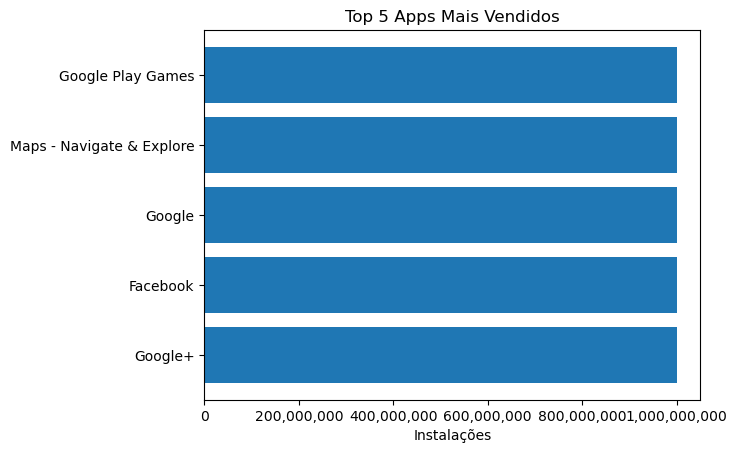

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


df = pd.read_csv('googleplaystore.csv')


df_sem_duplicatas = df.drop_duplicates().copy()


df_sem_duplicatas['Installs'] = df_sem_duplicatas['Installs'].str.replace('[+,]', '', regex=True).astype(int)


top_5_apps = df_sem_duplicatas.sort_values(by='Installs', ascending=False).head(5)

plt.barh(top_5_apps['App'], top_5_apps['Installs'])
plt.xlabel('Instalações')
plt.title('Top 5 Apps Mais Vendidos')

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.gca().invert_yaxis()
plt.show()

## Exercício 3 - Fazer um gráfico de pizza mostrando as categorias de acordo com a frequência em que elas aparecem

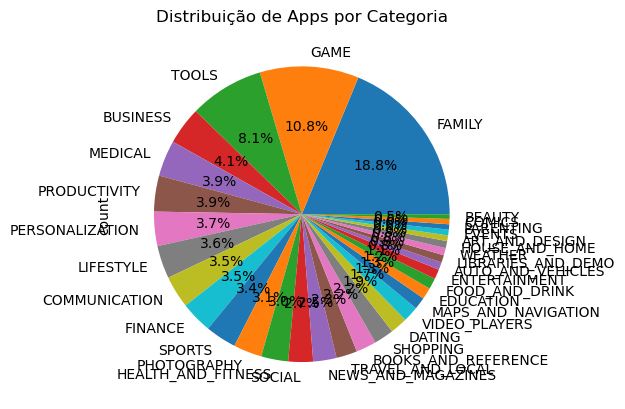

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


df = pd.read_csv('googleplaystore.csv')


df_sem_duplicatas = df.drop_duplicates().copy()

df_sem_duplicatas['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribuição de Apps por Categoria')

plt.show()

## Exercício 4 - Mostrar qual o app mais caro no Dataset

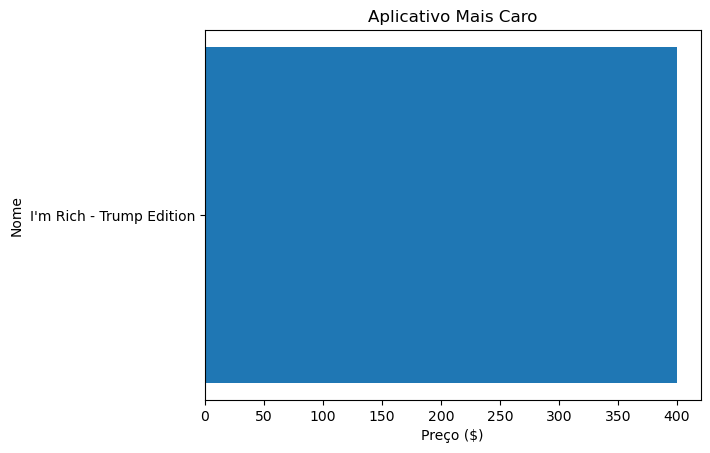

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplaystore.csv')

df_sem_duplicatas = df.drop_duplicates().copy()

df_sem_duplicatas['Price'] = df_sem_duplicatas['Price'].str.replace('[$]', '', regex=True).astype(float)

maior = df_sem_duplicatas.sort_values(by='Price', ascending=False).head(1)

plt.barh(maior['App'], maior['Price'])
plt.title('Aplicativo Mais Caro')
plt.xlabel('Preço ($)')
plt.ylabel('Nome')
plt.show()

## Mostrar Quantos Apps são classificados como Mature 17+

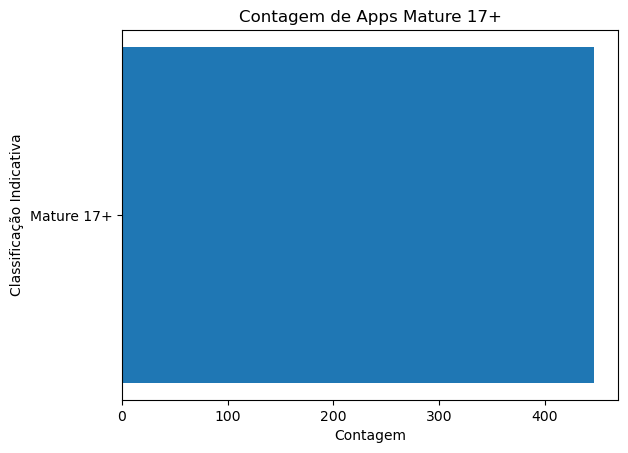

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplaystore.csv')

df_sem_duplicatas = df.drop_duplicates()

df_sem_duplicatas['Content Rating'].value_counts()

df_sem_duplicatas = df_sem_duplicatas[df_sem_duplicatas['Content Rating'] == 'Mature 17+']

plt.barh(df_sem_duplicatas['Content Rating'].value_counts().index, df_sem_duplicatas['Content Rating'].value_counts().values)

plt.title('Contagem de Apps Mature 17+')
plt.xlabel('Contagem')
plt.ylabel('Classificação Indicativa')
plt.show()

## Exercício 6 - Mostrar os 10 Apps com maior numero de reviews

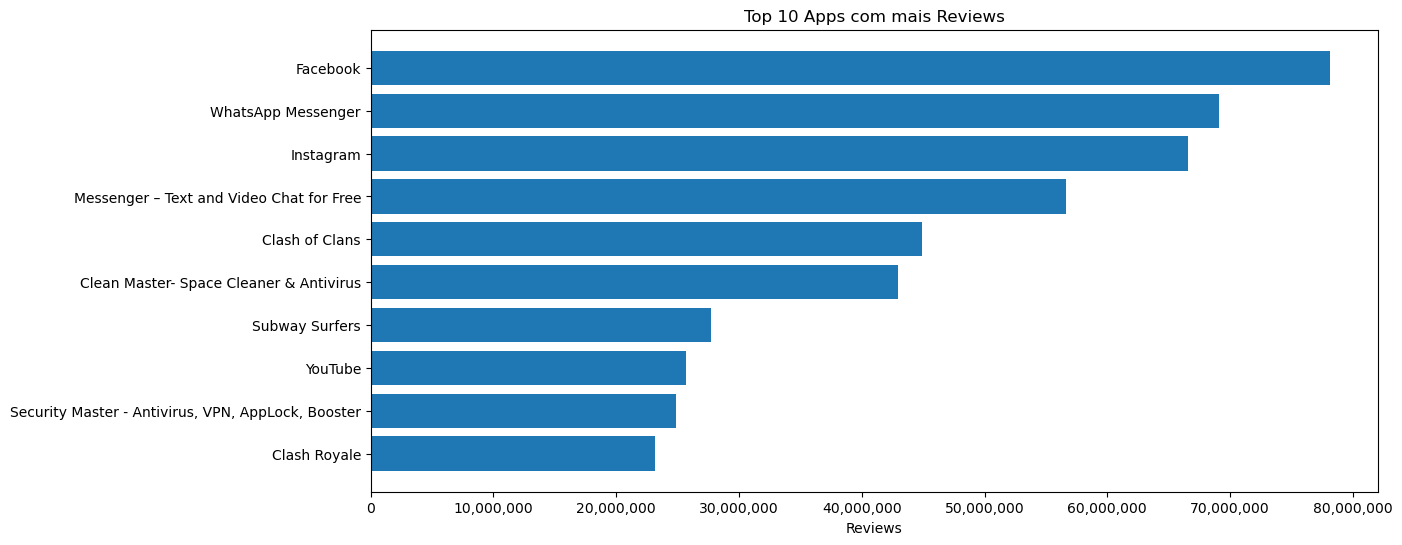

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = pd.read_csv('googleplaystore.csv')

plt.figure(figsize=(13, 6))

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df = df.dropna(subset=['Reviews'])

df_sem_duplicatas = df.loc[df.groupby('App')['Reviews'].idxmax()]

top_10_apps = df_sem_duplicatas.sort_values(by='Reviews', ascending=False).head(10)

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.barh(top_10_apps['App'], top_10_apps['Reviews'])
plt.xlabel('Reviews')
plt.title('Top 10 Apps com mais Reviews')
plt.gca().invert_yaxis()
plt.show()

## Exercício 7 - criar 2 Cálculos de minha escolha: Quantidade de apps por avaliação  /  App Mais Pesado

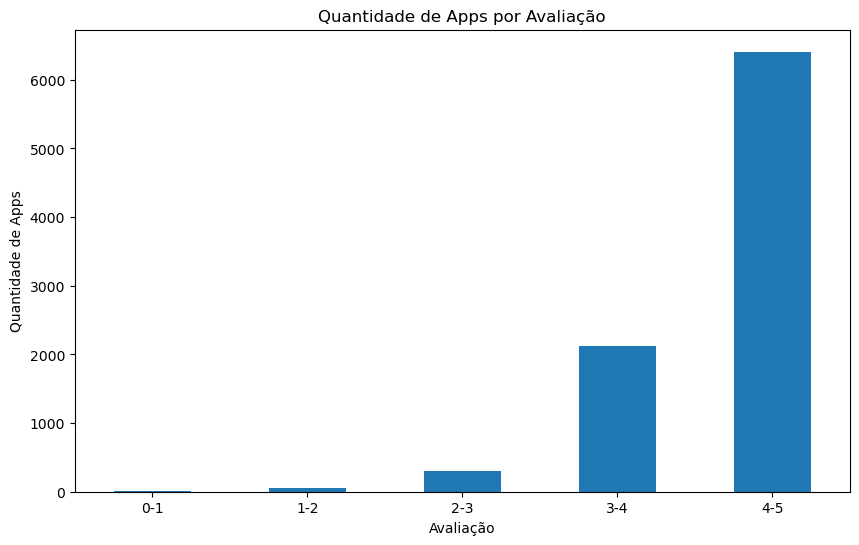

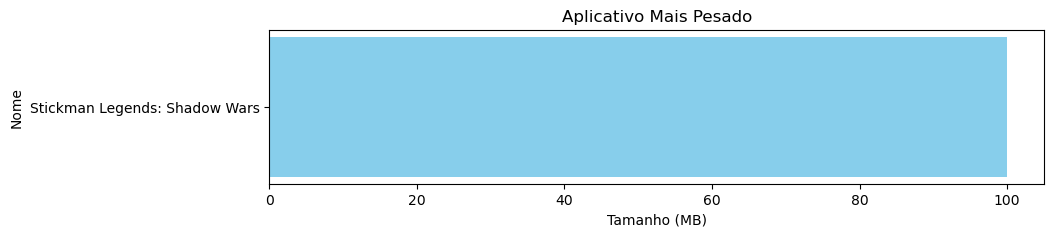

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('googleplaystore.csv')

df = df.drop_duplicates()

## Criei uma nova coluna para categorizar as avaliações
## utilizando a função nativa do pandas pd.cut, que divide os valores em bins.
## Depois contei a quantidade de apps por categoria de avaliação

bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

df['Rating Category'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

rating_counts = df['Rating Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Avaliação')
plt.ylabel('Quantidade de Apps')
plt.title('Quantidade de Apps por Avaliação')
plt.xticks(rotation=0)
plt.show()


## Agora O Cálculo do App Mais Pesado da loja

## Primeiro, criei uma função para converter o tamanho dos apps para MB
## Depois apliquei essa função na coluna Size do dataframe
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    elif 'G' in size:
        return float(size.replace('G', '')) * 1024
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)

maior = df.sort_values(by='Size', ascending=False).head(1)


plt.figure(figsize=(10, 2))

plt.barh(maior['App'], maior['Size'], color='skyblue')

plt.title('Aplicativo Mais Pesado')

plt.xlabel('Tamanho (MB)')
plt.ylabel('Nome')
plt.show()


## Exercício 8 - Fazer a representação em outra forma gráfica

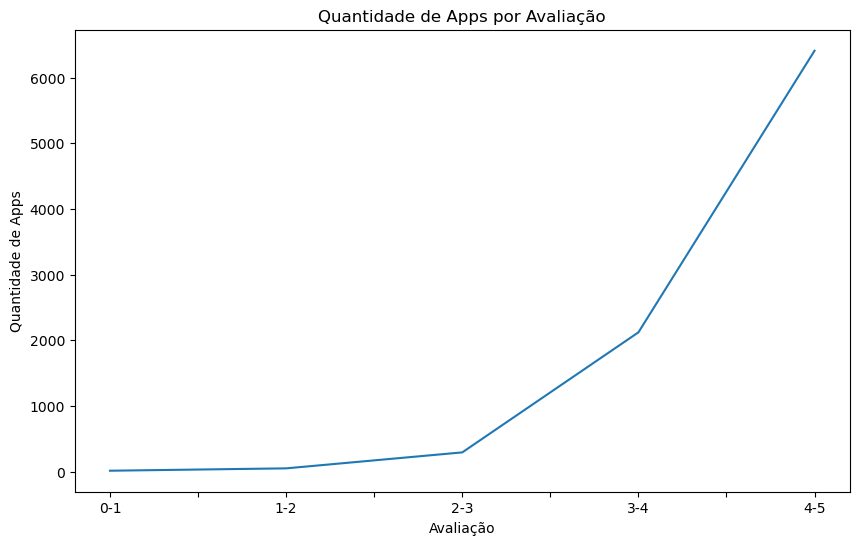

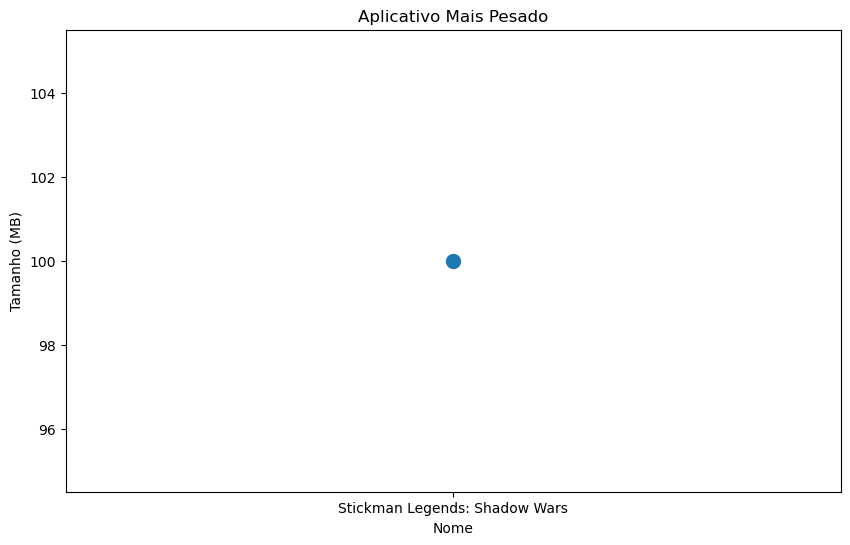

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('googleplaystore.csv')

df = df.drop_duplicates()

## Criei uma nova coluna para categorizar as avaliações
## utilizando a função nativa do pandas pd.cut, que divide os valores em bins.
## Depois contei a quantidade de apps por categoria de avaliação

bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

df['Rating Category'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

rating_counts = df['Rating Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='line')
plt.xlabel('Avaliação')
plt.ylabel('Quantidade de Apps')
plt.title('Quantidade de Apps por Avaliação')
plt.xticks(rotation=0)
plt.show()


## Agora O Cálculo do App Mais Pesado da loja

## Primeiro, criei uma função para converter o tamanho dos apps para MB
## Depois apliquei essa função na coluna Size do dataframe
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    elif 'G' in size:
        return float(size.replace('G', '')) * 1024
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)

maior = df.sort_values(by='Size', ascending=False).head(1)

## Para esse exemplo, utilizei um gráfico de dispersão para mostrar o app mais pesado
## Porém, como só temos um ponto, o gráfico não é muito útil

plt.figure(figsize=(10, 6))
plt.scatter(maior['App'], maior['Size'], s=100)
plt.title('Aplicativo Mais Pesado')
plt.xlabel('Nome')
plt.ylabel('Tamanho (MB)')
plt.show()